Gather Data (https://www.kaggle.com/competitions/titanic/data)

In [1]:
import pandas as pd
df = pd.read_csv('/content/tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


'Survived': survival of passenger (0 = No, 1 = Yes)

'Pclass': ticket class of passenger (1 = 1st, 2 = 2nd, 3 = 3rd)

'Name': name of passenger

'Sex': sex of passenger

'Age': age in years of passenger

'SibSp': # of siblings / spouses aboard the Titanic

'Parch': # of parents / children aboard the Titanic

'Ticket': Ticket number

'Fare': Passenger fare

'Cabin': Cabin number

'Embarked': Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [2]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [4]:
print(df[['Age', 'SibSp', 'Parch', 'Fare']].describe())#int only describe excluding passengerid

              Age       SibSp       Parch        Fare
count  332.000000  418.000000  418.000000  417.000000
mean    30.272590    0.447368    0.392344   35.627188
std     14.181209    0.896760    0.981429   55.907576
min      0.170000    0.000000    0.000000    0.000000
25%     21.000000    0.000000    0.000000    7.895800
50%     27.000000    0.000000    0.000000   14.454200
75%     39.000000    1.000000    0.000000   31.500000
max     76.000000    8.000000    9.000000  512.329200


How many passengers survived in total, how many died?

How many male and how many female passengers survived?

How many passengers in 1st, 2nd, and 3rd class survived?


# **How many passengers survived, how many died?**

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

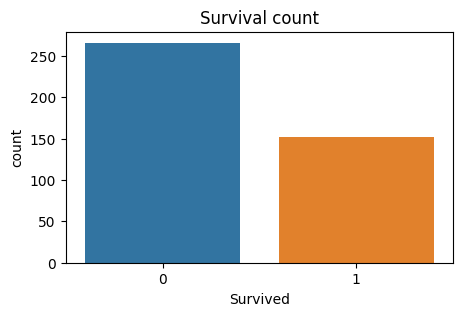

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 3))
sns.countplot(data=df, x='Survived')
plt.title('Survival count')
plt.show()

# **How many male and how many female passengers survived?**

In [8]:
print(df['Sex'].value_counts())

male      266
female    152
Name: Sex, dtype: int64


In [9]:
sex_survived = pd.crosstab(df['Sex'], df['Survived'])
print(sex_survived)

Survived    0    1
Sex               
female      0  152
male      266    0


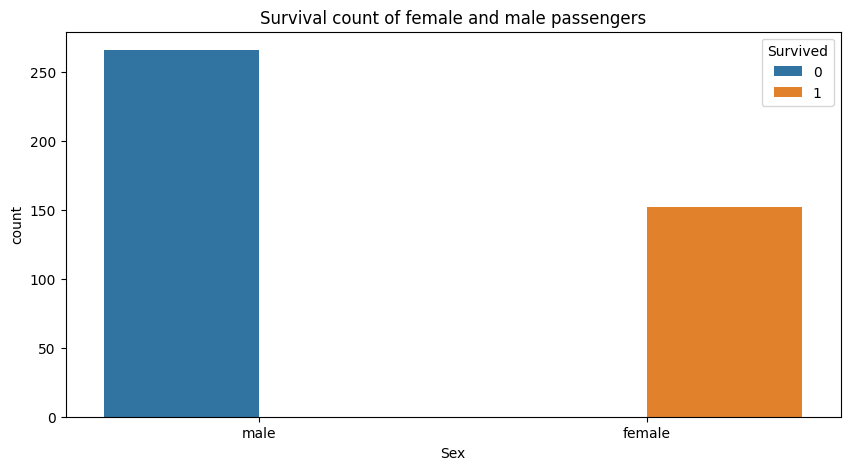

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title('Survival count of female and male passengers')
plt.show()

# **I wonder how, I wonder why :3**

# **How is the distribution of age for those passengers that survived and those who died?**

In [11]:
age_survived = pd.crosstab(df['Age'], df['Survived'])
print(age_survived)

Survived  0  1
Age           
0.17      0  1
0.33      1  0
0.75      1  0
0.83      1  0
0.92      0  1
...      .. ..
62.00     1  0
63.00     1  1
64.00     1  2
67.00     1  0
76.00     0  1

[79 rows x 2 columns]


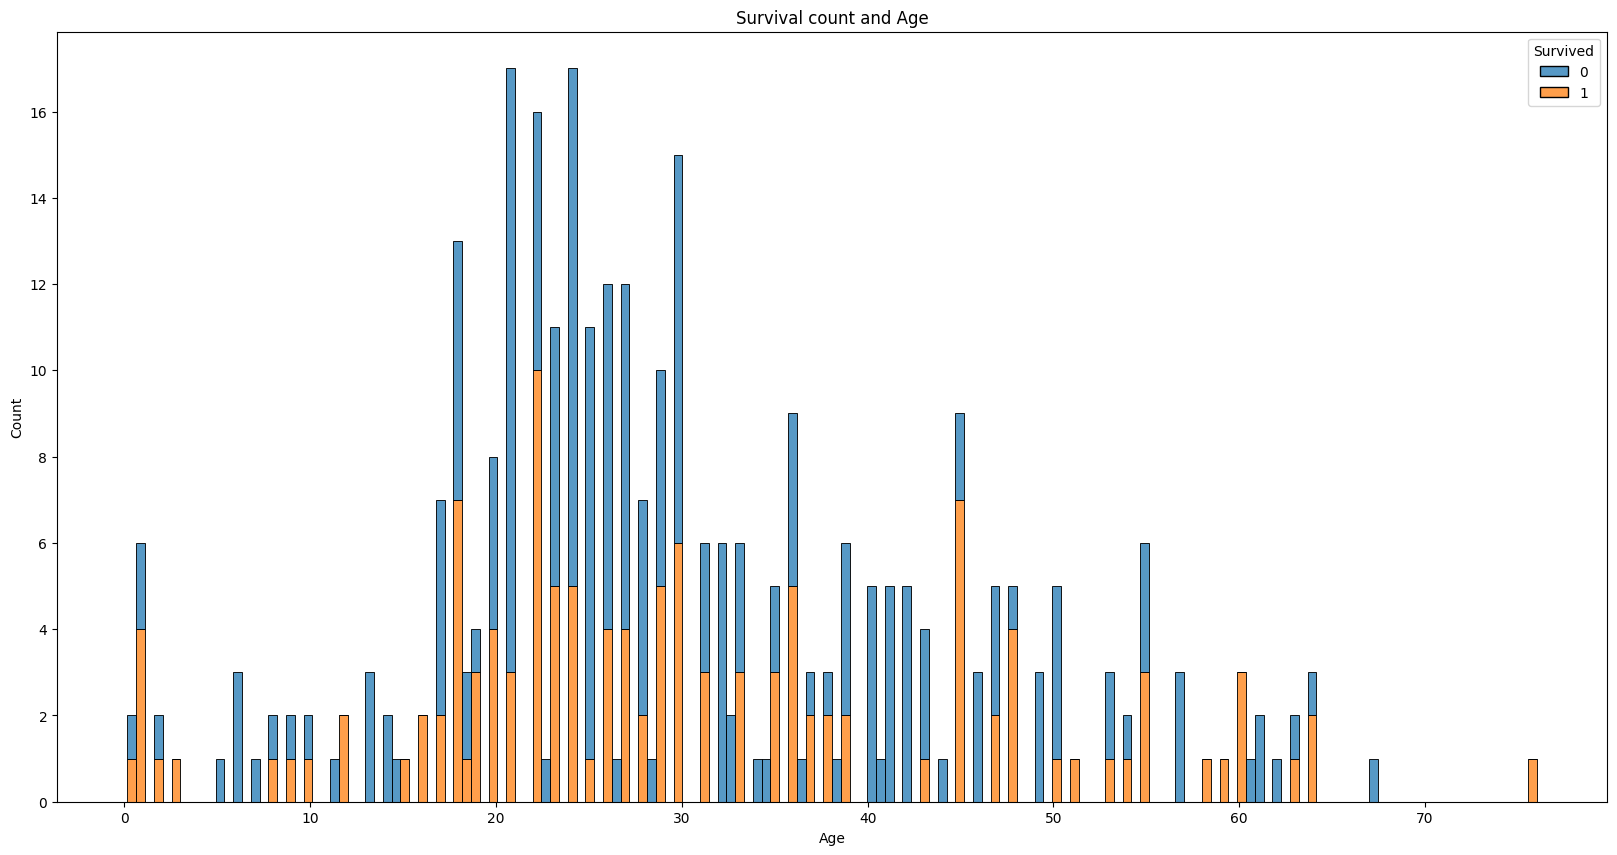

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.histplot(data=df, x='Age', hue='Survived', bins=160, multiple='stack', ax=ax)
plt.title('Survival count and Age')
plt.show()

# **How many passengers in 1st, 2nd, and 3rd class survived?**

In [13]:
class_survived = pd.crosstab(df['Pclass'], df['Survived'])
print(class_survived)

Survived    0   1
Pclass           
1          57  50
2          63  30
3         146  72


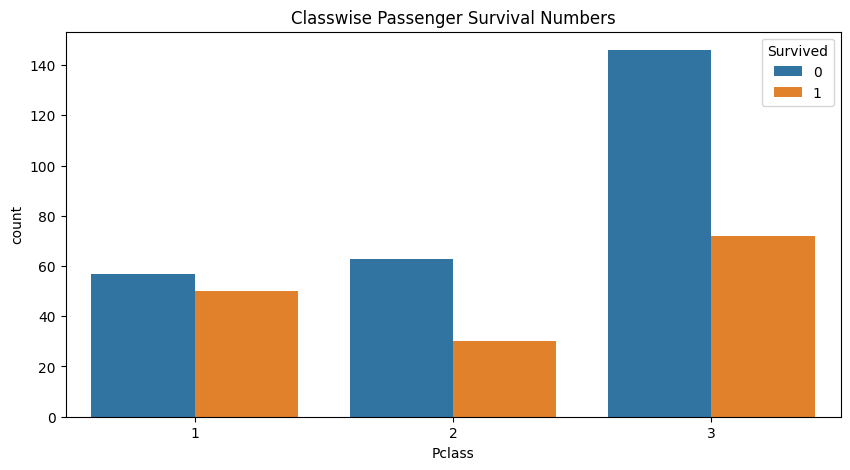

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Classwise Passenger Survival Numbers')
plt.show()

# **How many passengers from different ports survived?**

In [15]:
port_survived = pd.crosstab(df['Embarked'], df['Survived'])
print(class_survived)

Survived    0   1
Pclass           
1          57  50
2          63  30
3         146  72


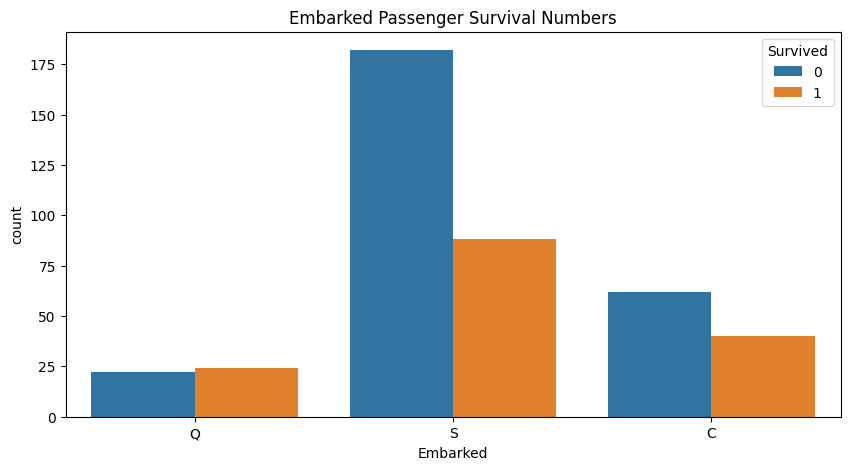

In [16]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.title('Embarked Passenger Survival Numbers')
plt.show()

# **KNN Application**

In [17]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
new_df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis =1)
new_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q


In [19]:
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
new_df['Embarked'] = lb.fit_transform(new_df['Embarked'])
lb2 = LabelEncoder()
new_df['Sex'] = lb2.fit_transform(new_df['Sex'])
new_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,1
1,1,3,0,47.0,1,0,7.0000,2
2,0,2,1,62.0,0,0,9.6875,1
3,0,3,1,27.0,0,0,8.6625,2
4,1,3,0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...
413,0,3,1,NaN,0,0,8.0500,2
414,1,1,0,39.0,0,0,108.9000,0
415,0,3,1,38.5,0,0,7.2500,2
416,0,3,1,NaN,0,0,8.0500,2


In [20]:
lb2.classes_

array(['female', 'male'], dtype=object)

In [21]:
new_df.isnull().sum()

Survived     0
Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [22]:
import numpy as np
print(np.mean(new_df['Age']))

30.272590361445783


In [23]:
new_df['Age'] = new_df['Age'].fillna(np.mean(new_df['Age']))

In [24]:
new_df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [25]:
x = new_df.drop(['Survived'],axis = 1)
y = new_df['Survived']

In [26]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [27]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 6, test_size = 0.2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(334, 7)
(334,)
(84, 7)
(84,)


In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')


x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)


In [30]:
import numpy as np

nan_rows_train = np.isnan(x_train).any(axis=1)
nan_rows_test = np.isnan(x_test).any(axis=1)

x_train = x_train[~nan_rows_train]
y_train = y_train[~nan_rows_train]

x_test = x_test[~nan_rows_test]



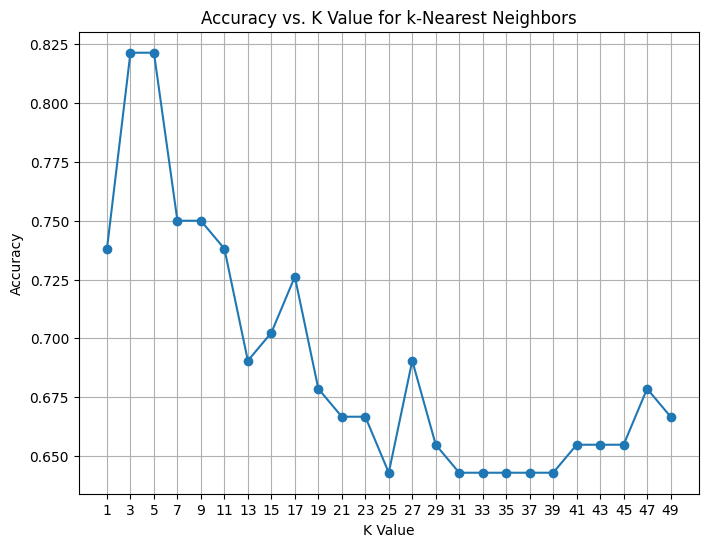

In [31]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

accuracies = []
k_values = [x for x in range(1,50,2)]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,p=1)
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs. K Value for k-Nearest Neighbors")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)

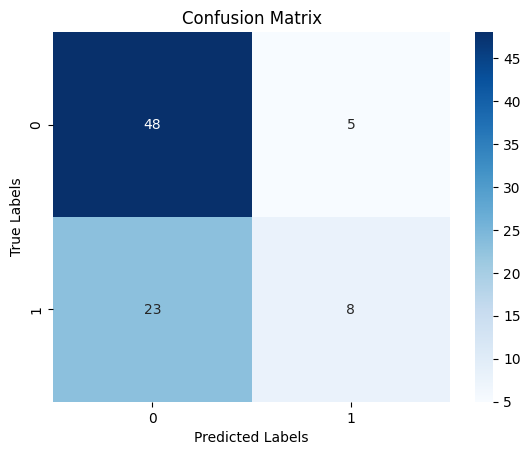

In [34]:
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [35]:
print(cr)

              precision    recall  f1-score   support

           0       0.68      0.91      0.77        53
           1       0.62      0.26      0.36        31

    accuracy                           0.67        84
   macro avg       0.65      0.58      0.57        84
weighted avg       0.65      0.67      0.62        84



# **Best K Value**

In [36]:
from sklearn.metrics import accuracy_score
accuracies = []
k_values = [x for x in range(1,50,2)]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,p=1)
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

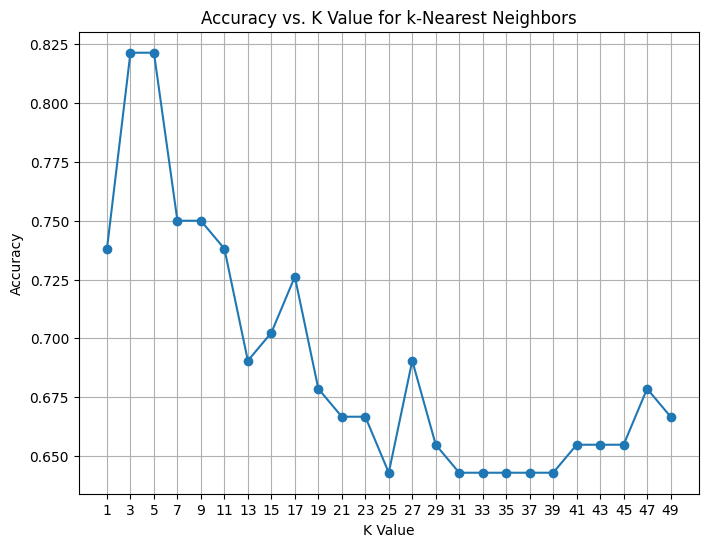

In [37]:
from sklearn.metrics import accuracy_score
accuracies = []
k_values = [x for x in range(1,50,2)]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k,p=1)
    knn.fit(x_train, y_train)

    y_pred = knn.predict(x_test)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs. K Value for k-Nearest Neighbors")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

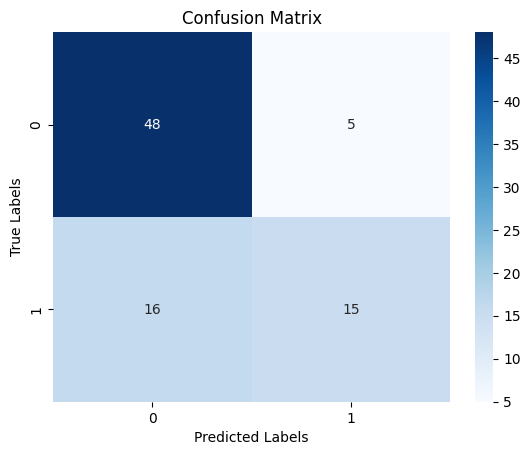

              precision    recall  f1-score   support

           0       0.75      0.91      0.82        53
           1       0.75      0.48      0.59        31

    accuracy                           0.75        84
   macro avg       0.75      0.69      0.70        84
weighted avg       0.75      0.75      0.73        84



In [38]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 9, p = 1)
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

cm = confusion_matrix(y_test,y_pred)
cr = classification_report(y_test,y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=True, yticklabels=True)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()
print(cr)

In [39]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [40]:
from keras.models import Sequential
from keras.layers import Dense

In [41]:
classifier = Sequential()
classifier.add(Dense(units = 128, kernel_initializer = 'uniform', activation = 'relu', input_dim = 7))
classifier.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))
classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(x_train, y_train, batch_size = 10, epochs = 100,verbose = 1)
score, acc = classifier.evaluate(x_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)
print('*'*20)
score, acc = classifier.evaluate(x_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)



Epoch 1/100
34/34 [==============================] - 6s 4ms/step - loss: 0.6862 - accuracy: 0.6257
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 0.6418 - accuracy: 0.6497
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 0.6284 - accuracy: 0.6617
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 0.6137 - accuracy: 0.6677
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 0.5863 - accuracy: 0.6796
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 0.5252 - accuracy: 0.7335
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 0.4746 - accuracy: 0.7844
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 0.3967 - accuracy: 0.8503
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 0.3796 - accuracy: 0.8473
Epoch 10/100
34/34 [==============================] - 0s 4ms/step - loss: 0.2227 - accuracy: 0.9641
Epoch 11/

Text(0.5, 23.52222222222222, 'Predicted label')

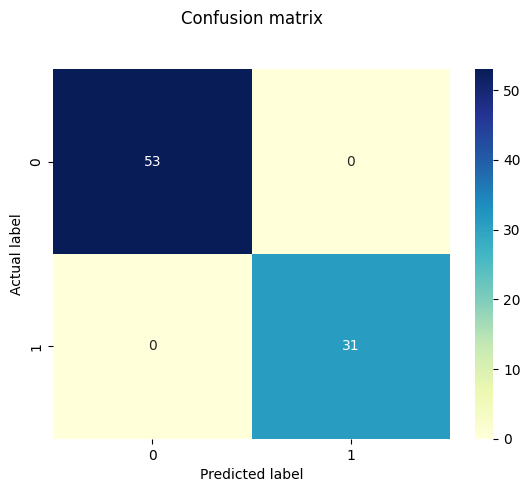

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

